In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('/home/babs/Documents/DIFACQUIM/PPI_ML'))

In [2]:
import phase1


In [3]:
from phase1.support_functions.df_management import get_data, get_random_smiles, get_positive_records, filter_positive_bits, filter_negative_bits
from phase1.support_functions.draw_molecules import get_ECFP4_bits, get_ECFP6_bits, draw_one_fragment

In [4]:
from phase1.support_functions.df_management import *

In [5]:
coeff = get_coefficients("SVM17_+_-std.csv")
coeff = coeff.Descriptors.to_list()
coeff[:5]

[1390, 935, 1160, 202, 160]

In [6]:
data = get_data("dataset_ecfp6.csv")
print(data.head())

   ipp_id chembl_id                                             SMILES  \
0     4.0       NaN     OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1ccccc1Br   
1     7.0       NaN  Cc1cc2CN(CCc2c(C)c1C(=O)N[C@@H](CNC(=O)c1cccs1...   
2    18.0       NaN     OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1cccnc1Cl   
3    22.0       NaN  Nc1ccc(C(=O)N[C@@H](Cc2c[nH]c3ccccc23)C(O)=O)c...   
4    24.0       NaN  Cc1cc2CN(CCc2c(C)c1C(=O)N[C@@H](CNC(=O)c1cccs1...   

  library  PPI family  PPI    0    1    2    3  ...  2038  2039  2040  2041  \
0     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   
1     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   
2     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   
3     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   
4     PPI  LFA / ICAM  Yes  0.0  1.0  0.0  0.0  ...   0.0   0.0   0.0   0.0   

   2042  2043  2044  2045  2046  2047  
0   0.0   0.0   0.0   0.0   0.0   0.0  


/home/babs/.pyenv/versions/miniconda3-3.8-4.9.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
# bring molecule information
molecule0 = data.iloc[0]
molecule0

ipp_id                                                     4
chembl_id                                                NaN
SMILES        OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1ccccc1Br
library                                                  PPI
PPI family                                        LFA / ICAM
                                   ...                      
2043                                                       0
2044                                                       0
2045                                                       0
2046                                                       0
2047                                                       0
Name: 0, Length: 2054, dtype: object

In [8]:
#positive records for molecule0
molecule0_positive = get_positive_records(molecule0)

In [9]:
molecule0_positive[:5]

[1, 46, 57, 79, 80]

In [10]:
import rdkit
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole

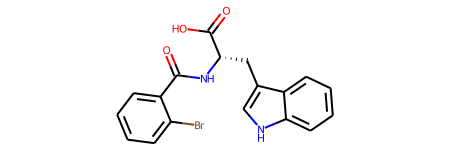

In [11]:
#Visualize molecules
mol0_draw = Chem.MolFromSmiles(molecule0.SMILES)
mol0_draw

In [12]:
# moleculule0 bits
fragments_molecule0 = get_ECFP6_bits(molecule0.SMILES)

In [13]:
#encontrar moleculas que estan en coeff y en fragments


[1910]

In [14]:
fragments_molecule0[-5:]

[1917, 1937, 1970, 1991, 2013]

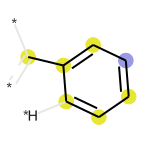

In [58]:
# draw fragments for molecule 0
# draw_one_fragment(molecule0.SMILES, 57, 3)
draw_one_fragment(molecule0.SMILES, 2013, 3)

In [16]:
img_.save("bit_2013.png","PNG")

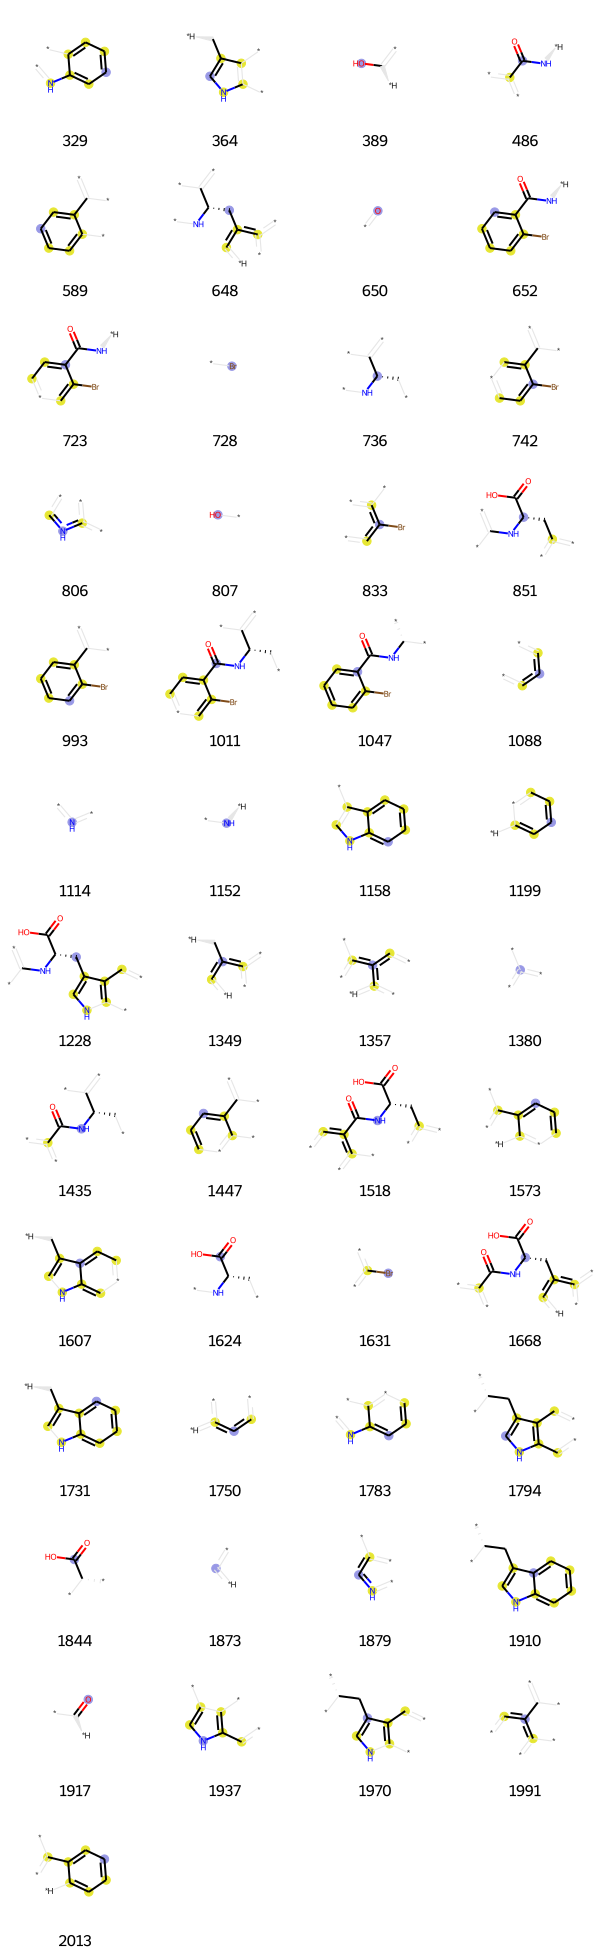

In [17]:
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(
        mol0_draw, radius=3, bitInfo=bi)
tpls =[(mol0_draw,x,bi) for x in fp.GetOnBits()]
# print(tpls)
Draw.DrawMorganBits(tpls[12:],molsPerRow=4,legends=[str(x) for x in fp.GetOnBits()][12:])

# filter positives

In [31]:
bits_ = [1390]
positives_0 = filter_positive_bits(bits_, data)
positives_0

,ipp_id,chembl_id,SMILES,library,PPI family,PPI,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
261,1503.0,NaN,CNC(=O)[C@H](Cc1ccc2ccccc2c1)N1CC(=O)N(Cc2ccc(...,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,1650.0,NaN,COc1ccc(C2=N[C@H]([C@H](N2C(=O)N2CCNC(=O)C2)c2...,PPI,"MDM2-Like / P53, MDM2-like dimer",Yes,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
318,333.0,NaN,COc1ccc(CN([C@@H](C(=O)NCc2ccccc2)c2ccc3cc(OCC...,PPI,Myc / Max,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319,410.0,NaN,CCCCN([C@@H](C(=O)NCc1ccccc1)c1ccc2cc(OCC(=O)O...,PPI,Myc / Max,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320,571.0,NaN,COc1ccc(CN([C@@H](C(=O)NC2CCCCC2)c2ccc3cc(OCC(...,PPI,Myc / Max,Yes,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,NaN,Eflornithine,NCCCC(N)(C(F)F)C(O)=O,FDA,NaN,No,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3930,NaN,Brexpiprazole,O=C1NC2=CC(OCCCCN3CCN(CC3)C3=C4C=CSC4=CC=C3)=C...,FDA,NaN,No,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3999,NaN,Paritaprevir,[H][C@@]12C[C@]1(NC(=O)[C@]1([H])C[C@H](CN1C(=...,FDA,NaN,No,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4329,NaN,Copanlisib,COC1=C(OCCCN2CCOCC2)C=CC2=C1N=C(NC(=O)C1=CN=C(...,FDA,NaN,No,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# positives_0

In [33]:
bits_ = [1390, 935]
positives_1 = filter_positive_bits(bits_, data)
print(f"molecules : {positives_1.shape}")
print(positives_1.iloc[0][["ipp_id", "SMILES"]])

molecules : (93, 2054)
ipp_id                                                 1503
SMILES    CNC(=O)[C@H](Cc1ccc2ccccc2c1)N1CC(=O)N(Cc2ccc(...
Name: 261, dtype: object


In [34]:
positive_molecule = positives_1.iloc[0].SMILES
positive_molecule

'CNC(=O)[C@H](Cc1ccc2ccccc2c1)N1CC(=O)N(Cc2ccc(cc2)-c2cccnc2)[C@@H](CC(C)C)C1=O'

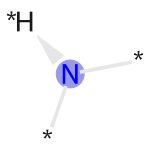

In [35]:
draw_one_fragment(positive_molecule, 935, 3)

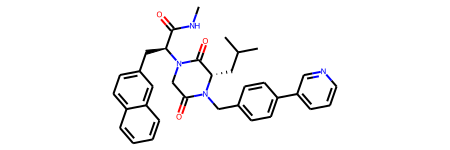

In [93]:
mol_ = Chem.MolFromSmiles(positive_molecule)
mol_

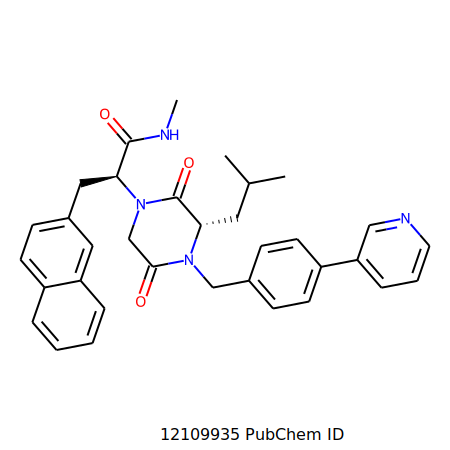

In [297]:
from rdkit import Chem
from IPython.display import SVG
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

mol = Chem.MolFromSmiles('CNC(=O)[C@H](Cc1ccc2ccccc2c1)N1CC(=O)N(Cc2ccc(cc2)-c2cccnc2)[C@@H](CC(C)C)C1=O')
rdDepictor.Compute2DCoords(mol)
drawer = rdMolDraw2D.MolDraw2DSVG(450, 450)
drawer.DrawMolecule(mol)
drawer.FinishDrawing()

# svg to text
s = drawer.GetDrawingText()
s = s.replace('svg:','')

# use svgutils to add text to svg
import svgutils.transform as sg
fig = sg.fromstring(s)
label = sg.TextElement(160, 440, 
                       "12109935 PubChem ID", size=16, 
                       #font='sans-serif', 
                       #anchor='middle', 
                      # color='#119933'
                      )
fig.append(label)
fig.save("1503.svg")
SVG(fig.to_str())

In [72]:
mol_ = Chem.Draw.MolToImage(mol_)
type(mol_)

PIL.PngImagePlugin.PngImageFile

In [24]:
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Draw
positive_mol = Chem.MolFromSmiles(positive_molecule)
bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(
        positive_mol, radius=3, bitInfo=bi)

In [ ]:
desired_bits =  (1450, 1531, 1535, 1586)

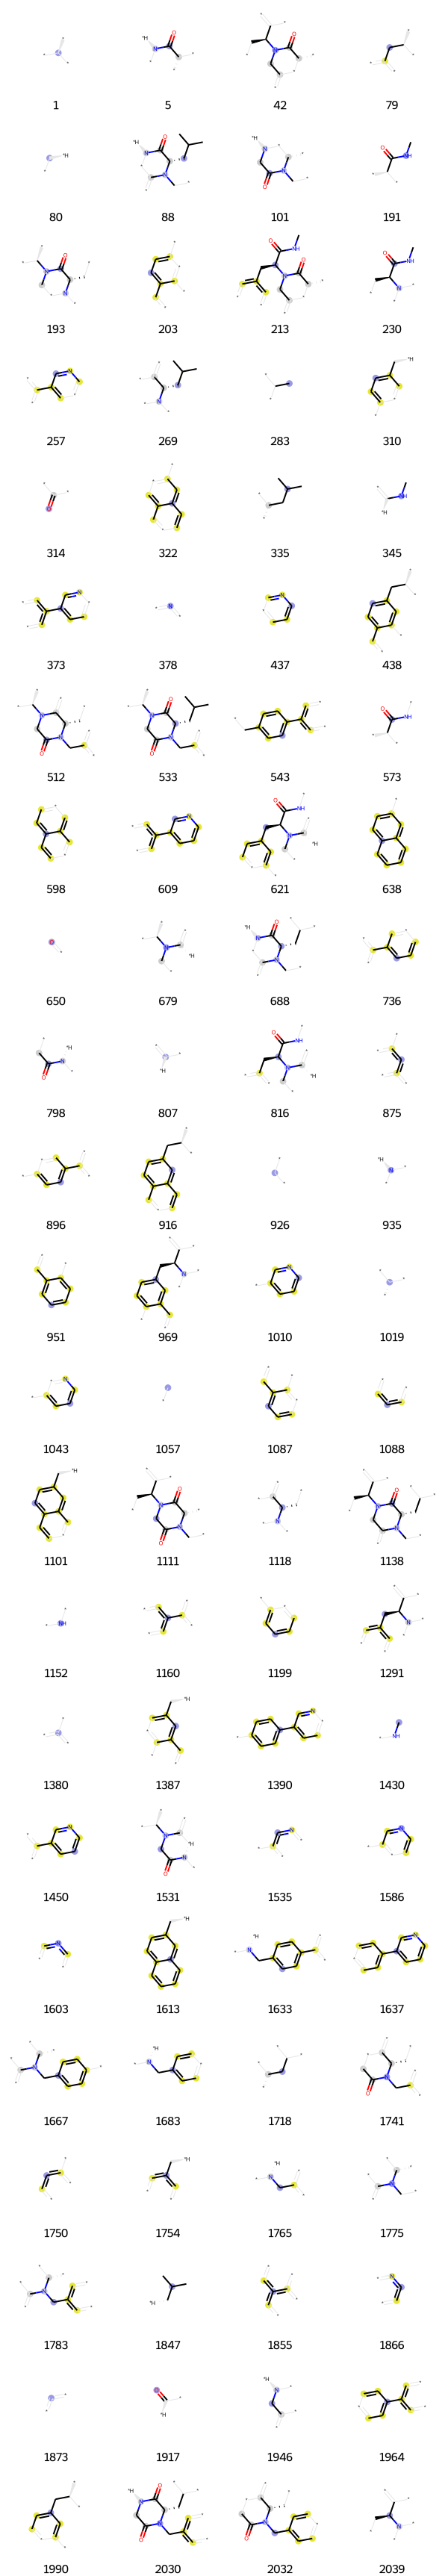

In [39]:
desired_bites = common_bits(coeff, get_ECFP6_bits(positive_molecule))
desired_bites

[1390, 935, 1160, 573]

In [ ]:
#set desired bites manually

In [288]:
#Visualizacion con filtro
tpls =[(positive_mol,x,bi) for x in fp.GetOnBits() if x in desired_bits]
# print(tpls)


drawOptions = Draw.rdMolDraw2D.MolDrawOptions()
drawer = Draw.DrawMorganBits(tpls,molsPerRow=4,legends=[str(x) for x in fp.GetOnBits() if x in desired_bits ], 
                             #useSVG=True,
                             subImgSize=(450, 450),
                             drawOptions = drawOptions,
                            )


In [293]:
drawer.save("1503_fragments.jpg")

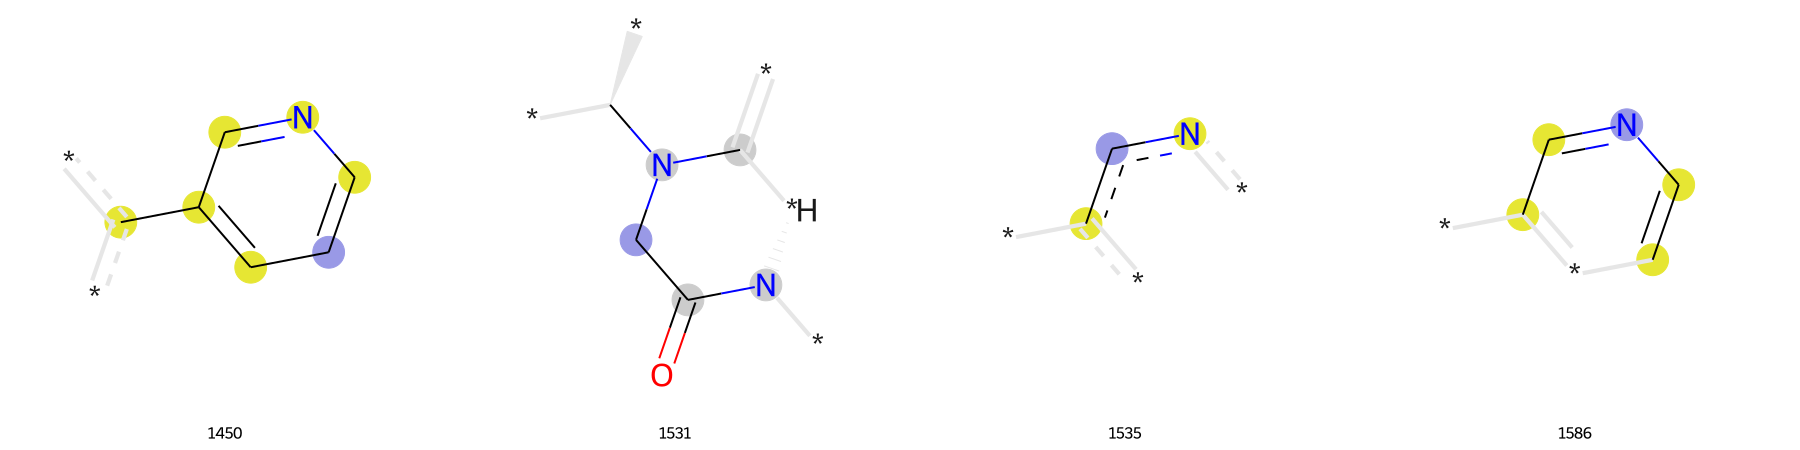

In [294]:
drawer

In [298]:
from PIL import Image
#Read the two images
#image1 = mol_
image1 = Image.open('1503.jpg')
image1.show()
image2 = Image.open('1503_fragments.jpg')
#image2.show()
#resize, first image
image1 = image1.resize((450, 450))
#image2 = image2.resize((450, 450))
image1_size = image1.size
image2_size = image2.size
new_image = Image.new('RGB',(5*image1_size[0], image1_size[1]), (450, 450, 450))
new_image.paste(image1,(0,0))
new_image.paste(image2,(image1_size[0],0))
new_image.save("id1503_merged.jpg","JPEG")
new_image.show()

# filter negatives

In [28]:
negative_0 = filter_negative_bits(["558"], data)
negative_0.head(2)

,ipp_id,chembl_id,SMILES,library,PPI family,PPI,0,1,2,3,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,4.0,NaN,OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1ccccc1Br,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,NaN,Cc1cc2CN(CCc2c(C)c1C(=O)N[C@@H](CNC(=O)c1cccs1...,PPI,LFA / ICAM,Yes,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
negative_molecule_0 = negative_0.iloc[0]
negative_molecule_0.SMILES
# draw_one_fragment(positive_molecule, 57)

'OC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)c1ccccc1Br'

In [30]:
draw_one_fragment(positive_molecule, 57)

TypeError: draw_one_fragment() missing 1 required positional argument: 'r'

In [ ]:
draw_one_fragment(positive_molecule, 57)

In [ ]:
negative_1 = filter_negative_bits(["558", "1"], data)
negative_1.head()

In [ ]:
# calculo de porcentajes 548
negatives = negative_0[negative_0["library"]=="PPI"].shape[0]

In [ ]:
total = data[data["library"]=="PPI"].shape[0]

In [ ]:
percentage = (negatives/total)
percentage